# Linear Regression in Python with Scikit-Learn

### Simple Linear Regression (univariate model)

In [1]:
# import libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# load the dataset

dataset = pd.read_csv('student_scores.csv')

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data question: can we predict the score based on the number of hours studied? 

In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


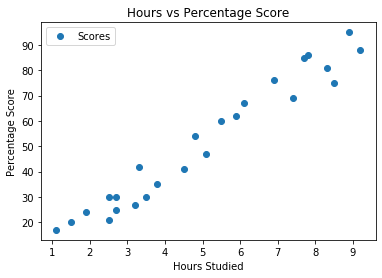

In [6]:
# lets plot our data points on a 2D graph to eyeball our dataset

dataset.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
from scipy.stats import pearsonr

# we are using pearson r here as these two variables are continuous / quantitative 

# the other most famous correlation test is the spearmans test 
# used with ordinal data / or when the relationship between two variables is not linear
# eg of ordinal data include socio economic status: low, medium, high income, or extremely dislike, dislike, neutral etc

In [9]:
corr = pearsonr(dataset['Hours'], dataset['Scores'])
print(corr)

# the first number is our correlation coefficient - this goes from +1 to -1

(0.9761906560220885, 9.132624467459842e-17)


In [10]:
# H0 = there is no relationship between hours studied and score 

# if p-value is < 0.05 - we can reject the null hypothesis 

# p-value = 0.00000000000913

# becasue it is less than 0.05 we can reject the null hypothesis

from the graph above, we can clearly see this is a positive correlation between the number of hours studies and the percentage score

In [11]:
import seaborn as sns

# seaborn scatterplot with regression line

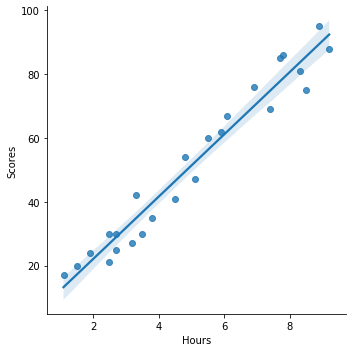

In [12]:
sns.lmplot(x = 'Hours', y = 'Scores', data = dataset)

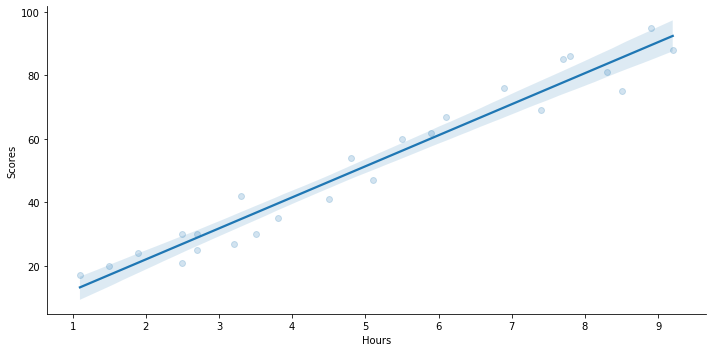

In [16]:
sns.lmplot(x = 'Hours', y = 'Scores', data = dataset, aspect = 2, scatter_kws = {'alpha': 0.2})

## Preparing the Data

In [17]:
# next step is to divide the data into 'attributes' and 'labels'

# attributes are also called features and independent variables

# labels can also be called target and dependent variable

In [18]:
X = dataset[['Hours']] # x has to be defined as a matrix / (dataframe) / 2 dimentions 
y = dataset.Scores # y has to be defined as a vector / (series) / 1 dimention 


# we can also input more attributes into X

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
# the above script splits 80% of the data into training set, while 20% of the data to test set. 
# the test_size variable is where we actually specify the propotion of the test set. 

## Training the algorithm 

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# to retrieve the intercept 

print(regressor.intercept_)

2.018160041434662


In [25]:
# to retrieve the slope (coefficient of x)

print(regressor.coef_)

[9.91065648]


In [26]:
# this means that for every one unit of change in hours studied, the change in score is about 9.91

## Making Predictions

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
# the y_pred is a numpy array that contains all the predicted values for the input values in the X_test series 

In [29]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [30]:
# comparing the actual output values for the X_test with the predicted values: 

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [31]:
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Though our model is not very precise, the predicted percentages are close to the actual values 

In [32]:
n_hours = [[9]]
regressor.predict(n_hours)

array([91.21406837])

In [33]:
df.reset_index()

,index,Actual,Predicted
0,5,20,16.884145
1,2,27,33.732261
2,19,69,75.357018
3,16,30,26.794801
4,11,62,60.491033


In [34]:
df.reset_index(drop= True, inplace = True)

In [35]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<function matplotlib.pyplot.show(*args, **kw)>

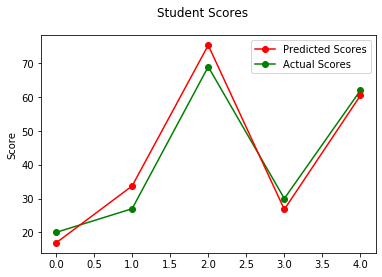

In [36]:
# plot the model's performance against the test data set 

fig = plt.figure()
fig.suptitle('Student Scores')

actual, = plt.plot(df.index, y_test, 'go-', label = 'Actual Scores')

predicted, = plt.plot(df.index, y_pred, 'ro-', label = 'Predicted Scores')

plt.ylabel('Score')
plt.legend(handles = [predicted, actual])
plt.show

## Evaluating the Algorithm

#### R-Squared 
how effective the model is for predicting

#### Mean Absolute Error (MAE)
the mean of the absolute value of errors 

#### Mean Squared Error (MSE)
the mean of the squared errors 

#### Root Mean Squared Error (RMSE)
the square root of the mean of the squared errors

In [37]:
from sklearn import metrics

print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)
# This would mean a prediction can have a -4 to +4 confidence interval
# ideally you want 0 - a prediction with no errors.
# lower values of RMSE shows a better fit model

# to find out whether the RMSE is a good score or not, we find the mean of the scores 
# Then we measure that in comparison to the RMSE
# so for our example the mean is 51.48 and the RMSE is 4.65
# the RMSE is below 10% of the mean
# we consider this a good score 
# the percentage is arbitrary - meaning depending on what you are looking for / how accuratley you want to predict 
# will dictate how good your model is - however 10% is a good benchmark

R-Squared: 0.9454906892105354
Mean Absolute Error (MAE): 4.183859899002982
Mean Squared Error (MSE): 21.598769307217456
Root Mean Squared Error (RMSE): 4.647447612100373


In [38]:
dataset.Scores.mean()

51.48

you can see that the value of the RMSE is 4.65, which is less than 10% of the mean values of the scores of all students, ie 51.48. This means that the algorithm did a decent job.

# Multiple Linear Regression (multivariate model)

#### data question: can we predict the petrol consumption (in millions of gallons) in 48 US states based upon petrol taxes (in cents), capita income (dollars), paved hgihways (in miles) and the proportion of population that has a driving licence?

In [40]:
# load the dataset

petrol = pd.read_csv('petrol_consumption.csv')

In [41]:
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [42]:
# see the statistical details of the dataset 

petrol.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [43]:
# preparing the data 

X = petrol[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']] # independent variables
y = petrol.Petrol_Consumption # dependent variable 

In [44]:
# divide the data into the trainging and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the algorithm

In [45]:
regressor_m = LinearRegression()
regressor_m.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
regressor_m.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [48]:
coeff_df = pd.DataFrame(regressor_m.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


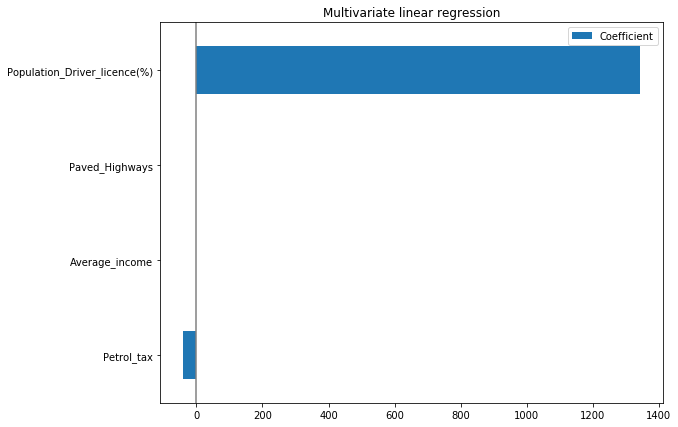

In [49]:
coeff_df.plot(kind = 'barh', figsize = (9,7))
plt.title('Multivariate linear regression')
plt.axvline(x=0, color = '.5') # this is vertical line at 0 

so if we interpret the coefficients: if the petrol tax went from 9 to 10 - the petrol consumption would decrease by 40 million gallons

this alos means that if we increase the population of driving licences the petrol consumption would increase by 1.3 billion gallons 

### Making Predictions

In [50]:
y_pred = regressor_m.predict(X_test)

In [51]:
y_pred

array([469.39198872, 545.64546431, 589.66839402, 569.7304133 ,
       649.77480909, 646.63116356, 511.60814841, 672.47517717,
       502.07478157, 501.2707342 ])

In [52]:
df_m = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [53]:
df_m

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [54]:
df_m.reset_index(drop = True, inplace = True)

In [55]:
df_m

,Actual,Predicted
0,534,469.391989
1,410,545.645464
2,577,589.668394
3,571,569.730413
4,577,649.774809
5,704,646.631164
6,487,511.608148
7,587,672.475177
8,467,502.074782
9,580,501.270734


<function matplotlib.pyplot.show(*args, **kw)>

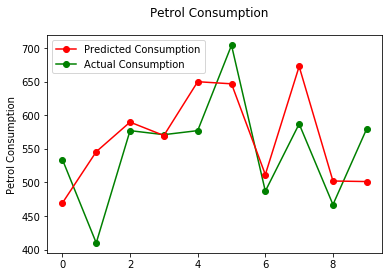

In [57]:
# plot the model's performance against the test data set

fig = plt.figure()
fig.suptitle('Petrol Consumption')

actual, = plt.plot(df_m.index, y_test, 'go-', label = 'Actual Consumption')

predicted, = plt.plot(df_m.index, y_pred, 'ro-', label = 'Predicted Consumption')

plt.ylabel('Petrol Consumption')
plt.legend(handles = [predicted, actual])
plt.show

as we can see in some of the points the prediction is ok, but in others it is actually not so good, ie the first 2

there are assumptions that we have to make when doing linear regressions that are not satisfied 

the first assumption is that our independent variable(s) and dependent variable are linearly correlated. ie each x axis is singularly correlated with what we watn to predict, the y-axis. This is the first assumption. 

the second assumption is there is no corrleation between the independent variables, ie the petrol tax, average income and paved highways need to be correlated with petrol consumption but they cannot be correlated amungst themselves. So if I increase petrol tax I can not increase the average income etc. If they are correlated between themselves, this is multicollinearity. 

Multicollinearity - In statitics, multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. The second assumption is there is no multicollinearity. 

the third assumption is that the errors that we get cannot depend on the values of X. We assume the errors we get for our predictions are normally distributed

strictly speaking, non-normality of the residuals is an indication of an inadequate model. It means that the errors the model makes are not consistent across variable and observations (ie the errors are not random) 

we are trying to predict real world scenarios - normal distributions are general representations of the 'real world', therefore if our errors are not normally distributed, our model isn't predicting accurately. 

## Evaluating the algorithm

#### the final step is to evaluate the performance of the algorithm

In [58]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Squared: 0.2036193241012173
Mean Absolute Error (MAE): 56.82224747896471
Mean Squared Error (MSE): 4666.344787588363
Root Mean Squared Error (RMSE): 68.3106491521517


In [59]:
# the R squared is telling us we can explain 20% of the data with this model 
# that is the percentage of the petrol consumption we can explain with this model 
# this is quite a low R squared but maybe we aren't interested in a model that explains 100%

In [60]:
# mean consumption 

petrol.Petrol_Consumption.mean()

576.7708333333334

In [61]:
# 10% of the mean would be 57 - we have 68 which is greater but isn't too far off 
# we can say that our algorithm is not very accurate because it is giving us an error thta is more than 10% of the mean
# byt we can still make some reasonable predictions becasue as we can see from the visualisation we do get some predictions 
# close to the actual value

## What is Multicollinearity? 

Multicollinearity happens when two or more features (independent variables) are highly correlated with each other 

In [63]:
petrol.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [64]:
correlations = petrol[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']].corr()

In [65]:
correlations

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037
Average_income,0.012665,1.000000,0.050163,0.157070
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000


In [66]:
# we can see that petrol tax and paved highways are slightly correlated, although slight, this can still effect our model. 
# and as we can see from the coefficient, paved highways doesn't have a strong relationship with petrol consumption (line 49)
# we could go back to our model and take paved highways out, and see if it improves our predictions

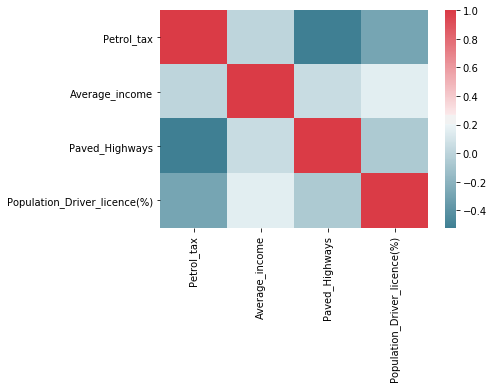

In [67]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(correlations, cmap = cmap)

rule of thumb: if the corrleation > 0.8 then severe multicollinearity may be present

## Residual Plots 

residuals are the difference between the dependent variable (y) and the predicted varable (y_pred)

A residual plot is a scatter plot of the independent variables and the residual.

In [68]:
residuals = y_test - y_pred

In [69]:
residuals

29     64.608011
4    -135.645464
26    -12.668394
30      1.269587
32    -72.774809
37     57.368836
34    -24.608148
40    -85.475177
7     -35.074782
10     78.729266
Name: Petrol_Consumption, dtype: float64

Text(0, 0.5, 'Residual')

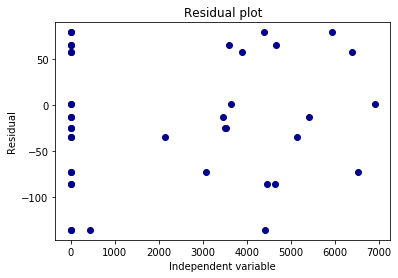

In [70]:
plt.plot(X_test, residuals, 'o', color = 'darkblue')
plt.title('Residual plot')
plt.xlabel('Independent variable')
plt.ylabel('Residual')

when analysisng the residual plot, you should see a random pattern of points. if you notice a trnd in this plot, you could have an issue with the coefficients.

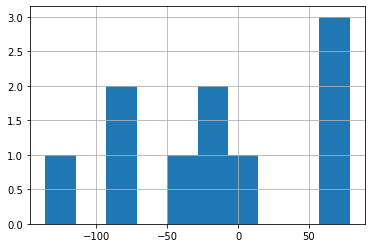

In [71]:
residuals.hist()

we would expect this to be normally distributed